# 統計計算w2
Lesson 4: 數值與符號為積分計算

In [11]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 範例 1：數值微分（Numerical differentiation）
For the function f(x) = e^{2x}, compute f'(x), f''(x), f'''(x) at x=a.

In [12]:
x = sp.symbols('x')
f = sp.exp(2*x) # 定義函數
a = 0  # 要計算的點

fp = sp.diff(f, x, 1).subs(x, a)
fpp = sp.diff(f, x, 2).subs(x, a)
fppp = sp.diff(f, x, 3).subs(x, a)

print(fp, fpp, fppp)

2 4 8


練習： Observe the value of $ f'(a) $ by decreasing $“dx”$ from $ 10^{-1}$ , $ 10^{-2} $, $ \cdots $ , $ 10^{-16}$ , where $ f(x) = -x^3+6x^2 $  and $ a=1 $.

In [ ]:
# 定義函數
def f(x):
    return -x**3 + 6*x**2

a = 1
true_val = -3*a**2 + 12*a  # f'({a}) 的解析值

print(f"True derivative f'({a}) = {true_val}\n")
print("{:<10} {:<20} {:<20}".format("dx", "Approx f'(a)", "Error"))

result = []
min_error = float('inf')
best_k = None
best_approx = None

for k in range(1, 17):
    dx = 10**(-k)
    approx = (f(a + dx) - f(a)) / dx
    error = abs(approx - true_val)
    print(f"1e-{k:<8} {approx:<20.12f} {error:<20.12f}")
    result.append([f"1e-{k}", approx, error])
    if error < min_error:
        min_error = error
        best_k = k
        best_approx = approx

print(f"\n最準確的 dx 是 1e-{best_k}，近似值為 {best_approx:.12f}，誤差為 {min_error:.12f}")

# 用表格顯示所有結果
#df = pd.DataFrame(result, columns=["dx", "Approx f'(a)", "Error"])
#display(df)

True derivative f'(1) = 9

dx         Approx f'(a)         Error               
1e-1        9.290000000000       0.290000000000      
1e-2        9.029900000000       0.029900000000      
1e-3        9.002998999998       0.002998999998      
1e-4        9.000299989994       0.000299989994      
1e-5        9.000030000017       0.000030000017      
1e-6        9.000002999748       0.000002999748      
1e-7        9.000000300574       0.000000300574      
1e-8        8.999999945303       0.000000054697      
1e-9        9.000000744663       0.000000744663      
1e-10       9.000000744663       0.000000744663      
1e-11       9.000000744663       0.000000744663      
1e-12       9.000800105241       0.000800105241      
1e-13       8.988365607365       0.011634392635      
1e-14       8.970602038971       0.029397961029      
1e-15       9.769962616701       0.769962616701      
1e-16       0.000000000000       9.000000000000      

最準確的 dx 是 1e-8，近似值為 8.999999945303，誤差為 0.000000054697


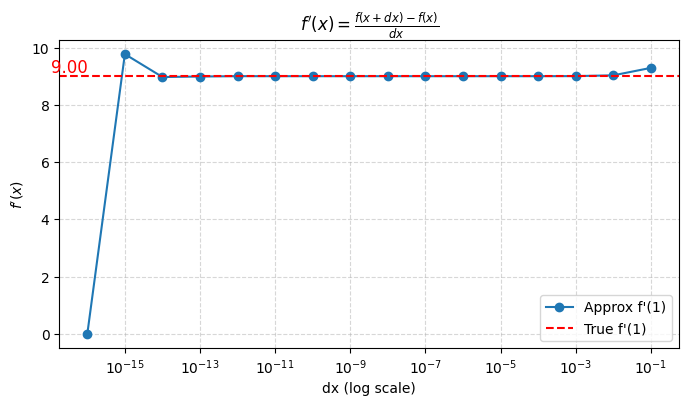

In [22]:
def f(x):
    return -x**3 + 6*x**2

a = 1
true_val = -3*a**2 + 12*a

dxs = [10**(-k) for k in range(1, 17)]
approxs = [(f(a + dx) - f(a)) / dx for dx in dxs]

plt.figure(figsize=(8, 4))
plt.semilogx(dxs, approxs, marker='o', label="Approx f'(1)")
plt.axhline(true_val, color='r', linestyle='--', label="True f'(1)")
plt.xlabel('dx (log scale)')
plt.ylabel(r"$f'(x)$")
plt.title(r"$f'(x)=\frac{f(x+dx)-f(x)}{dx}$")
plt.legend()
plt.text(dxs[-1], true_val, f"{true_val:.2f}", color='r', va='bottom', ha='right', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

練習： Draw $ f(x) $ and $ f'(x) $, where $ f(x) = e^{-x} \sin(x) $ 